# practicalMixGaussC

The goal of this part of the lab is to fit a mixture of gaussians model to some multi-dimensional data. To do this, we will first generate some data from a known mixture of gaussians model and fit our own mixture of gaussians model to the generated data. The parameters from our estimated mixture of gaussians model should roughly match those of the original known model. 

Note that you should not use multivariate_normal.pdf for calculating likelihood.

You should use this template for your code and fill in the missing 
sections marked "TO DO."



In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import time
import sys

%matplotlib inline

## Construct Ground Truth Mixture of Gaussians Model and Plot Some Points

Define some true parameters for our ground truth mixture of $k$ Gaussians model. We will represent the 
mixtures of Gaussians as a python dictionary. The mean field is a $d \times k$ matrix and the cov field is a 
$d \times d \times k$ matrix.

In [2]:
mixGaussTrue = dict()
mixGaussTrue['k'] = 3
mixGaussTrue['d'] = 2
mixGaussTrue['weight'] = np.array([0.1309, 0.3966, 0.4725])
mixGaussTrue['mean'] = np.array([[ 4.0491 , 4.8597],[ 7.7578 , 1.6335],[ 11.9945, 8.9206]]).T
mixGaussTrue['cov'] = np.reshape([0.5, 0.25], newshape=(1,1,2))
mixGaussTrue['cov'] = np.zeros(shape=(mixGaussTrue['d'],mixGaussTrue['d'],mixGaussTrue['k']))
mixGaussTrue['cov'][:,:,0] = np.array([[  4.2534, 0.4791], [0.4791, 0.3522]])
mixGaussTrue['cov'][:,:,1] = np.array([[  0.9729, 0.8723],[  0.8723,  2.6317]])
mixGaussTrue['cov'][:,:,2] = np.array([[  0.9886, -1.2244],[ -1.2244, 3.0187]])

**drawEMData2d**, **sampleFromDiscrete**, **getGaussian2SD**, and **drawGaussianOutline** are helper functions.

In [3]:
def sampleFromDiscrete(probDist):     
    """
    Draws a random sample from a discrete probability distribution using a rejection sampling method.  
    
    Keyword arguments:
    probDist -- discrete probability ditrubtion to sample from.
    
    Returns: 
    r -- sampled point.
    """
    nIndex = len(probDist)                                                                 
    while True:                                                                            
        #choose random index                                                               
        r=int(np.floor(np.random.uniform()*nIndex))                                        
        #choose random height                                                              
        randHeight = np.random.uniform()                                                   
        #if height is less than probability value at this point in the                     
        # histogram then select                                                            
        if randHeight<probDist[r]:                                                         
            break                                                                          
    return r                                                                               

In [4]:
def getGaussian2SD(m,s,angle1):
    """
    Find position of in xy co-ordinates at 2SD out for a certain angle.
    """
  
    if s.shape[1] == 1:
        s = diag(s)

    vec = np.array([np.cos(angle1), np.sin(angle1)])
    
    factor = 4/(vec@np.linalg.inv(s)@vec.T)
    
    x = np.cos(angle1) * np.sqrt(factor)
    y = np.sin(angle1) * np.sqrt(factor)

    x = x + m[0]
    y = y + m[1]
                
    return x,y

In [5]:
def drawGaussianOutline(m,s,w):
    """
    Draw 2DGaussian
    """
    angleInc = 0.1    
    c = (0.9*(1-w), 0, 0)

    for cAngle in np.arange(0,2*np.pi,angleInc):         
        angle1 = cAngle
        angle2 = cAngle+angleInc
        x1, y1 = getGaussian2SD(m,s,angle1)
        x2, y2 = getGaussian2SD(m,s,angle2)
        plt.plot([x1, x2],[y1, y2],'-',linewidth=2,color=c)                 
    return

In [6]:
def drawEMData2d(data,mixGauss):
    """
    Plot the data plot the mixtures of Gaussian model, mixGauss, on top of it.
    
    Keyword arguments:
    data -- d by n matrix of data points.
    mixGauss -- dict with mixture of gaussian information.
    
    """
    #set(gcf,'Color',[1 1 1])
    plt.cla() 
    plt.plot(data[0,:],data[1,:],'k.')

    for cGauss in range(mixGauss['k']):
        drawGaussianOutline(mixGauss['mean'][:,cGauss],mixGauss['cov'][:,:,cGauss],mixGauss['weight'][cGauss])
    
    return     


**TODO H HERE:**

Complete the TO DO in this function before moving on.

In [7]:
def mixGaussGen(mixGauss, nData):                                                                              
    """
    Generates data from a d-dimensional mixture of Gaussians model. 
    
    Keyword arguments:
    mixGauss -- dict containing the mixture of gaussians arguments.
    nData -- number of data points to generate.
    
    Returns: 
    data -- d by nData, generated data points. 
    
    """
    # create space for output data                                                                               
    data = np.zeros(shape=(mixGauss['d'], nData))                                                                            
    # for each data point                                                                                        
    for cData in range(nData):                                                                                   
        # randomly choose Gaussian according to probability distributions                                        
        h = sampleFromDiscrete(mixGauss['weight'])                                                               
        # draw a sample from the appropriate Gaussian distribution  
        # first sample from the covariance matrix (google how to do this - it
        # will involve the numpy function np.linalg.cholesky().  Then add the mean vector
        # TO DO (h)- insert data generation code here    
        Sigma = mixGauss["cov"][:, :, h] # Sample covariance
        mu = mixGauss["mean"][:, h] # Sample mean
        
        L = np.linalg.cholesky(Sigma)
        assert np.allclose(L @ L.T, Sigma)
        
        z = np.random.randn(mixGauss['d'])
        
        data[:, cData] = L @ z + mu                                                                                                         
    return data

With all the helper functions complete, we can now generate and plot some points from our model. The black points are the generated data points. The circles are what the gaussians look like.

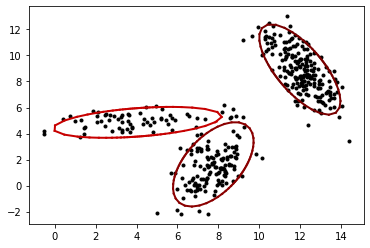

In [8]:
#define number of samples to generate
nData = 400;

#generate data from the mixture of Gaussians
#make sure you've filled in the routine above.
data = mixGaussGen(mixGaussTrue,nData)

#draw data, true Gaussians
drawEMData2d(data,mixGaussTrue)

## Explanation:

Clusters of individual points along with the true Gaussians that describe them

## Estimate MoG using the E-M Algorithm
Here we want to use the E-M algorithm to fit a MoG model to our data points. 

**TODO I HERE:** 

Fill out the missing parts below. 

The log likelihood is taken since the raw likelihood value could be too small for our machine's percision.

In [9]:
def getMixGaussLogLike(data, mixGaussEst): 
    pass # Implementation relies on calc_elementwise_like(), see below.

**TODO J HERE:** 

Fill out the missing parts below. 

In [10]:
def calc_elementwise_like(data, mixGaussEst):
    """
    Calculates the likelihood that each data point comes from each Gaussian.
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    mixGaussEst -- dict containing the estimated MoG parameters.
    
    Returns: 
    like -- n by k matrix.
    """
    
    D, nData = data.shape
    assert D == mixGaussEst["d"], (D, mixGaussEst["d"])
    
    K = mixGaussEst["k"]
    
    Sigma = mixGaussEst["cov"].transpose(2, 0, 1)
    X = data.T[:, None]
    Mu = mixGaussEst["mean"].T
    
    exp = np.exp(-0.5 * np.einsum("nab, kbc, ndc->nkad", X-Mu, np.linalg.inv(Sigma), X-Mu))
    exp_diag = mixGaussEst["weight"] * np.diagonal(np.einsum("niij -> nij", exp), axis1=1, axis2=2)
    like = 1 / ((2 * np.pi) ** (D / 2) * (np.linalg.det(Sigma)) ** 0.5) * exp_diag
    return like

In [11]:
def getMixGaussLogLike(data, mixGaussEst): 
    """
    Calculate the log likelihood for the whole dataset under a mixture of Gaussians model.
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    mixGaussEst -- dict containing the mixture of gaussians parameters.

    Returns: 
    logLike -- n vector containing the log likelihood for each pixel.
    
    """
    
    like = np.sum(calc_elementwise_like(data, mixGaussEst), axis=1)
    log_like = np.sum(np.log(like))

    return log_like

In [12]:
def fitMixGauss(data, k):
    """
    Estimate a k MoG model that would fit the data. Incremently plots the outcome.
               
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    k -- scalar representing the number of gaussians to use in the MoG model.
    
    Returns: 
    mixGaussEst -- dict containing the estimated MoG parameters.
    
    """
    
    #     MAIN E-M ROUTINE  
    #     In the E-M algorithm, we calculate a complete posterior distribution over                                  
    #     the (nData) hidden variables in the E-Step.  
    #     In the M-Step, we update the parameters of the Gaussians (mean, cov, w).   
    nDims, nData = data.shape


    postHidden = np.zeros(shape=(k, nData))

    # we will initialize the values to random values
    mixGaussEst = dict()
    mixGaussEst['d'] = nDims
    mixGaussEst['k'] = k
    mixGaussEst['weight'] = (1 / k) * np.ones(shape=(k))
    mixGaussEst['mean'] = 2 * np.random.randn(nDims, k)
    mixGaussEst['cov'] = np.zeros(shape=(nDims, nDims, k))
    for cGauss in range(k):
        mixGaussEst['cov'][:, :, cGauss] = 2.5 + 1.5 * np.random.uniform() * np.eye(nDims)
        

    # calculate current likelihood
    # TO DO (j) starts here - fill in this routine
    logLike = getMixGaussLogLike(data, mixGaussEst)
    print('Log Likelihood Iter 0 : {:4.3f}'.format(logLike))

    nIter = 30;

    logLikeVec = np.zeros(shape=(2 * nIter))
    boundVec = np.zeros(shape=(2 * nIter))

    fig, ax = plt.subplots(1, 1)
    for cIter in range(nIter):

        # ===================== =====================
        # Expectation step
        # ===================== =====================
        posteriors = calc_elementwise_like(data, mixGaussEst)
        postHidden = posteriors.T / np.sum(posteriors, axis=1)

        # ===================== =====================
        # Maximization Step
        # ===================== =====================
        # for each constituent Gaussian
        for cGauss in range(k):
            thisQ = postHidden[cGauss]
            # TO DO :  Update weighting parameters mixGauss.weight based on the total
            # posterior probability associated with each Gaussian. Replace this:
            mixGaussEst['weight'][cGauss] = np.sum(thisQ) / np.sum(postHidden)
            
            # TO DO :  Update mean parameters mixGauss.mean by weighted average
            # where weights are given by posterior probability associated with
            # Gaussian.
            mixGaussEst['mean'][:,cGauss] = thisQ @ data.T / np.sum(thisQ)
            
            # TO DO :  Update covarance parameter based on weighted average of
            # square distance from update mean, where weights are given by
            # posterior probability associated with Gaussian
            mu_k = mixGaussEst["mean"][:, cGauss]
            
            mixGaussEst['cov'][:,:,cGauss] = np.einsum("n,ni,nj->ij", thisQ, (data.T - mu_k), (data.T - mu_k)) / np.sum(thisQ)
        
        # draw the new solution
        drawEMData2d(data, mixGaussEst)
        fig.canvas.draw()
        plt.show()

        # calculate the log likelihood
        logLike = getMixGaussLogLike(data, mixGaussEst)
        print('Log Likelihood After Iter {} : {:4.3f}'.format(cIter, logLike))


    return mixGaussEst

### Time to put it all together!

Make sure you've filled all the TO DOs above! 

Log Likelihood Iter 0 : -8397.102


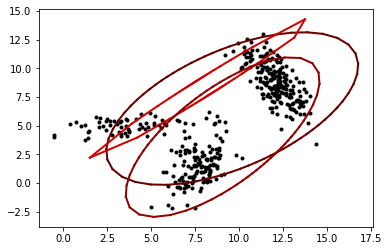

Log Likelihood After Iter 0 : -2027.464


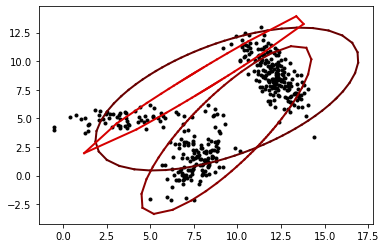

Log Likelihood After Iter 1 : -1982.428


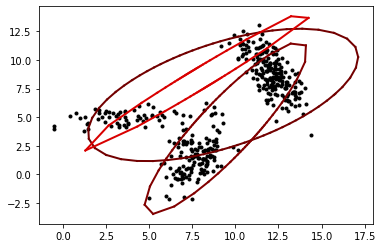

Log Likelihood After Iter 2 : -1958.556


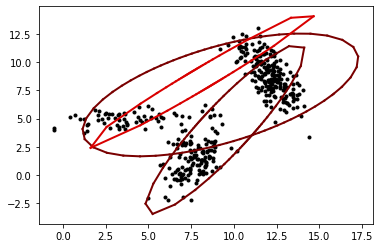

Log Likelihood After Iter 3 : -1950.767


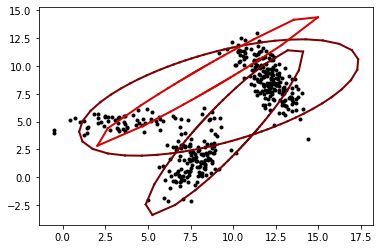

Log Likelihood After Iter 4 : -1948.585


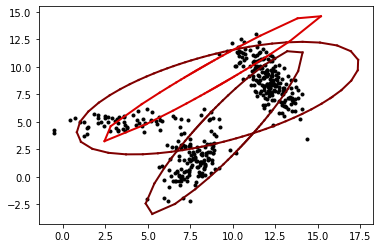

Log Likelihood After Iter 5 : -1947.361


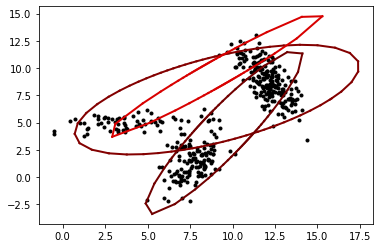

Log Likelihood After Iter 6 : -1945.831


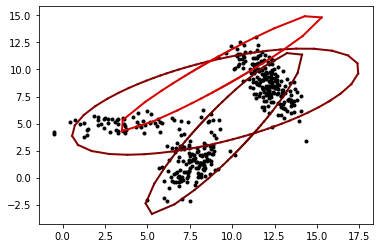

Log Likelihood After Iter 7 : -1943.461


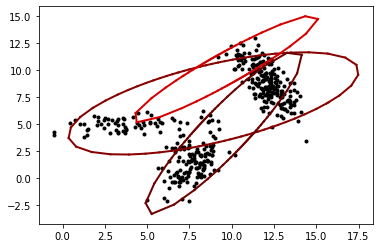

Log Likelihood After Iter 8 : -1939.458


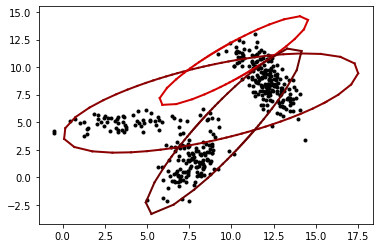

Log Likelihood After Iter 9 : -1930.193


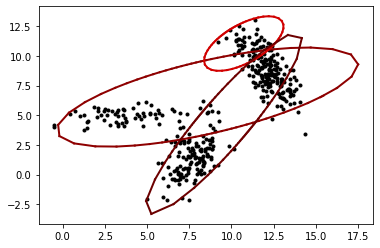

Log Likelihood After Iter 10 : -1898.661


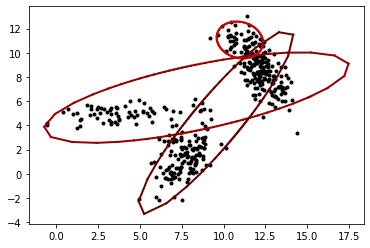

Log Likelihood After Iter 11 : -1863.008


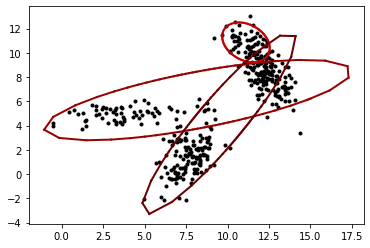

Log Likelihood After Iter 12 : -1843.797


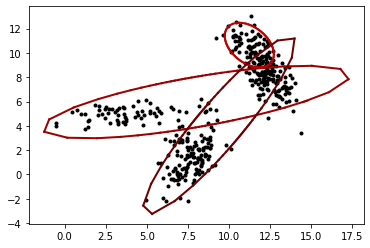

Log Likelihood After Iter 13 : -1824.461


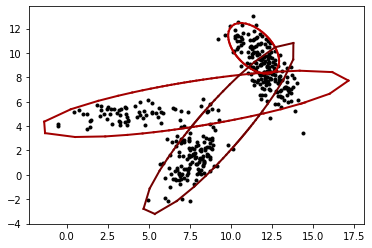

Log Likelihood After Iter 14 : -1801.499


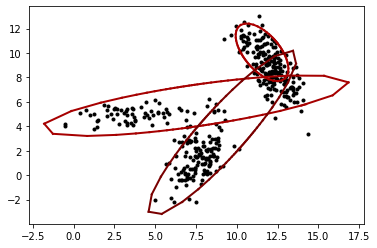

Log Likelihood After Iter 15 : -1771.939


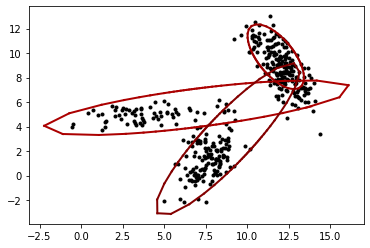

Log Likelihood After Iter 16 : -1734.605


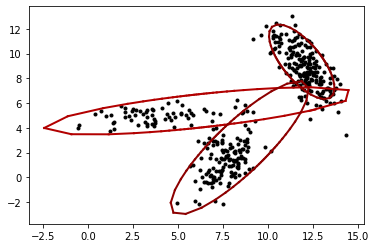

Log Likelihood After Iter 17 : -1687.909


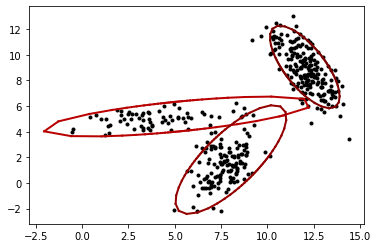

Log Likelihood After Iter 18 : -1641.131


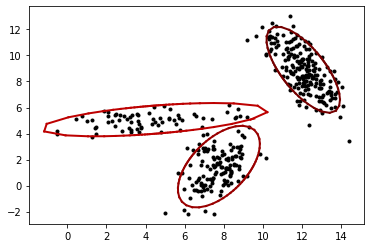

Log Likelihood After Iter 19 : -1600.295


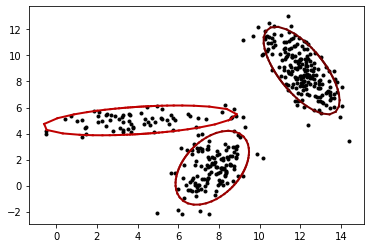

Log Likelihood After Iter 20 : -1591.626


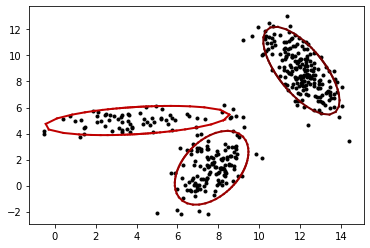

Log Likelihood After Iter 21 : -1591.328


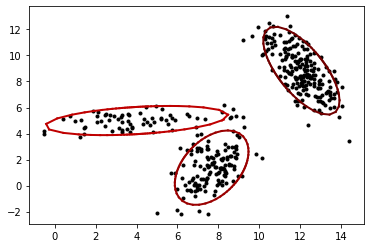

Log Likelihood After Iter 22 : -1591.295


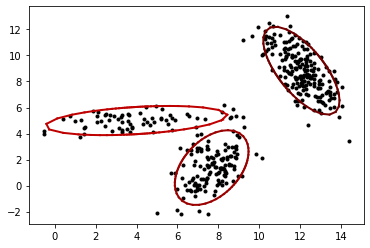

Log Likelihood After Iter 23 : -1591.283


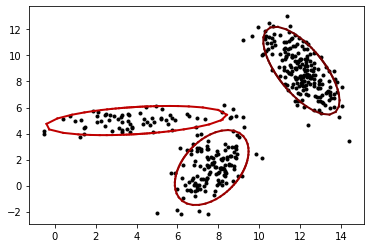

Log Likelihood After Iter 24 : -1591.278


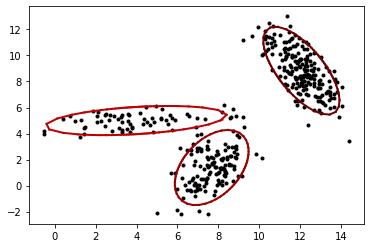

Log Likelihood After Iter 25 : -1591.276


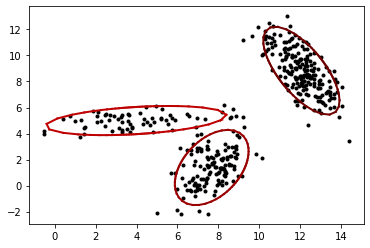

Log Likelihood After Iter 26 : -1591.275


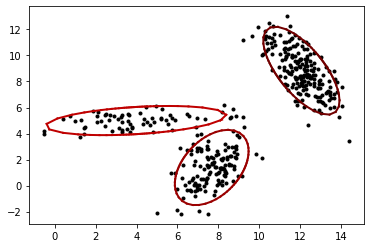

Log Likelihood After Iter 27 : -1591.275


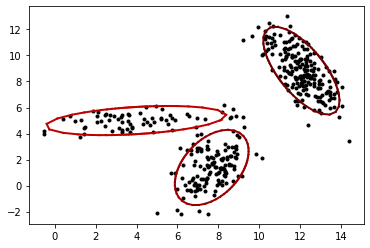

Log Likelihood After Iter 28 : -1591.275


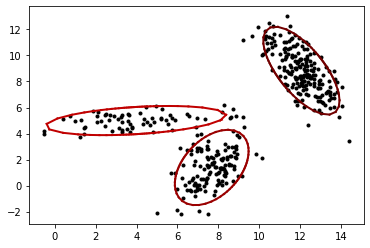

Log Likelihood After Iter 29 : -1591.275


In [13]:
#define number of components to estimate
nGaussEst = 3

#fit mixture of Gaussians (Pretend someone handed you some data. Now what?)
mixGaussEst = fitMixGauss(data,nGaussEst);

## Explanation:

Above is an iteration by iteration view of the Gaussians being modified (according to the E-M algorithm) to represent the clusters found in the training data.

In this case, at the final iteration, the Gaussians closely resembles the ground truth that is further up in the notebook. 

At times though (example with this data below), since the initialization is stochastic, the E-M algorithm will produce very strange clustering with the two clusters being placed into one Gaussian. Its likely that the model is assigning too much mass to the more extreme values and not enough to unseen values in the test set.

This could be mitigated by manually removing extreme values or by using a greater number of datapoints.

Log Likelihood Iter 0 : -6893.125


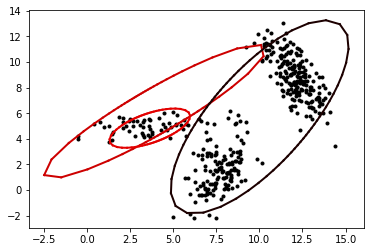

Log Likelihood After Iter 0 : -1944.582


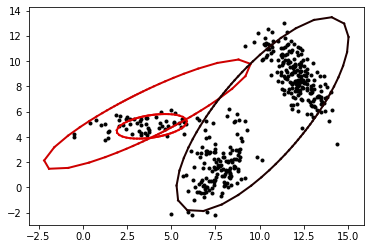

Log Likelihood After Iter 1 : -1916.463


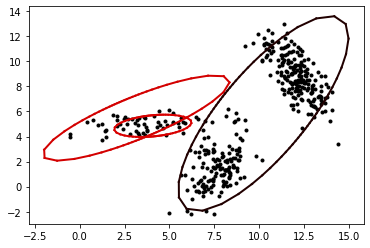

Log Likelihood After Iter 2 : -1901.228


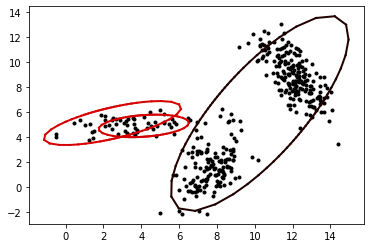

Log Likelihood After Iter 3 : -1885.550


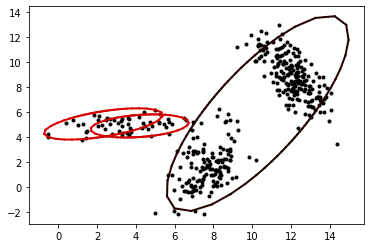

Log Likelihood After Iter 4 : -1882.365


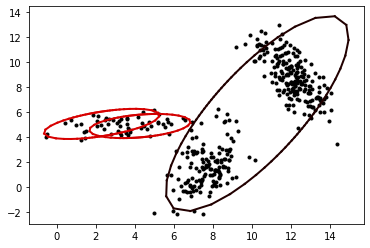

Log Likelihood After Iter 5 : -1881.984


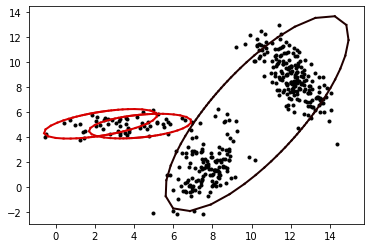

Log Likelihood After Iter 6 : -1881.757


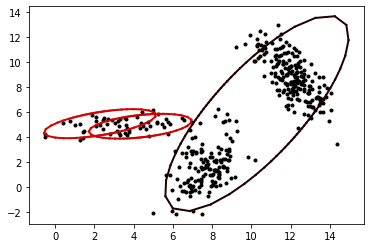

Log Likelihood After Iter 7 : -1881.540


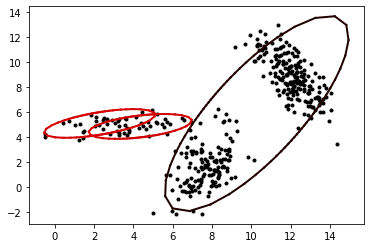

Log Likelihood After Iter 8 : -1881.283


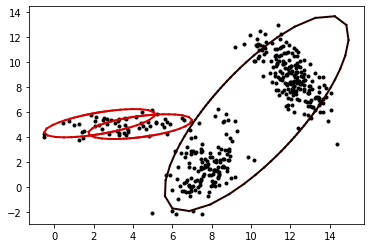

Log Likelihood After Iter 9 : -1880.949


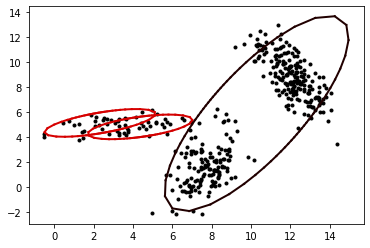

Log Likelihood After Iter 10 : -1880.498


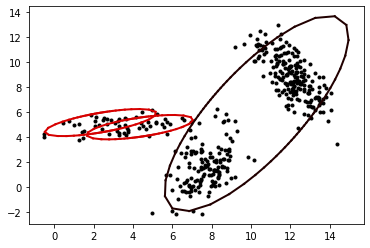

Log Likelihood After Iter 11 : -1879.909


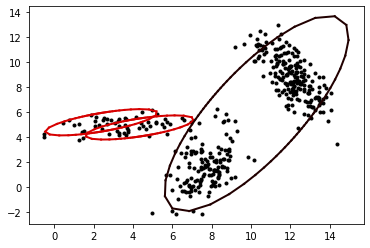

Log Likelihood After Iter 12 : -1879.252


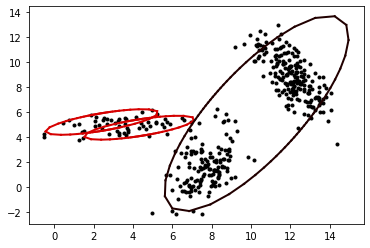

Log Likelihood After Iter 13 : -1878.720


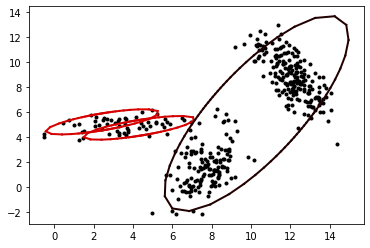

Log Likelihood After Iter 14 : -1878.421


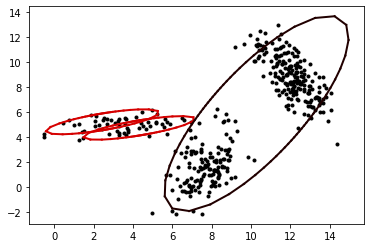

Log Likelihood After Iter 15 : -1878.278


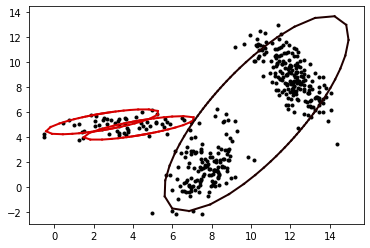

Log Likelihood After Iter 16 : -1878.195


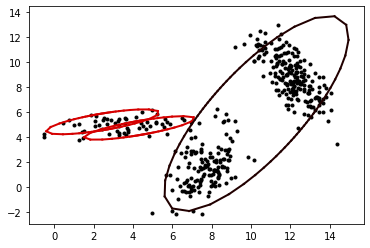

Log Likelihood After Iter 17 : -1878.136


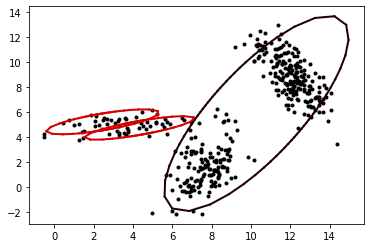

Log Likelihood After Iter 18 : -1878.088


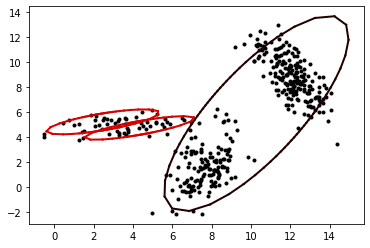

Log Likelihood After Iter 19 : -1878.051


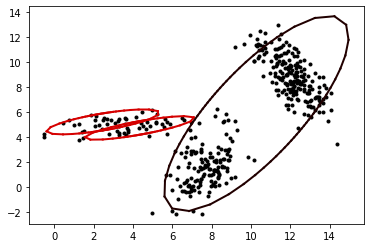

Log Likelihood After Iter 20 : -1878.021


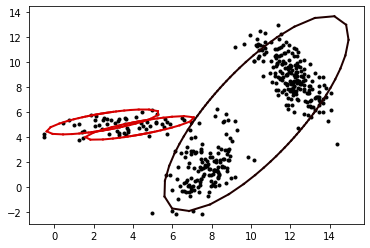

Log Likelihood After Iter 21 : -1877.998


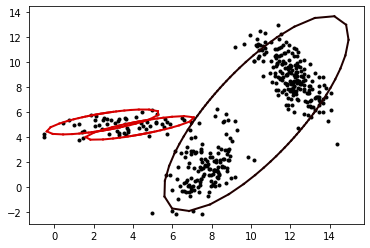

Log Likelihood After Iter 22 : -1877.981


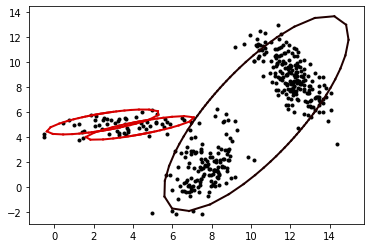

Log Likelihood After Iter 23 : -1877.967


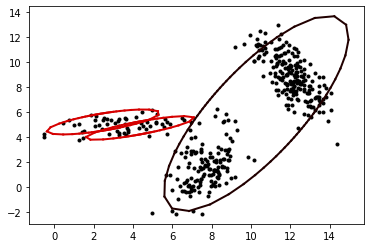

Log Likelihood After Iter 24 : -1877.958


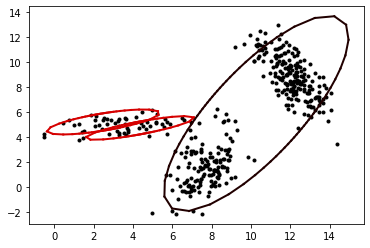

Log Likelihood After Iter 25 : -1877.950


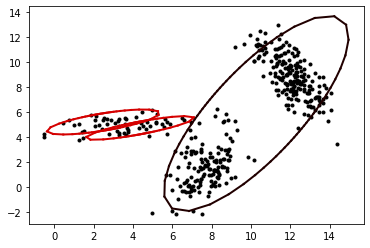

Log Likelihood After Iter 26 : -1877.945


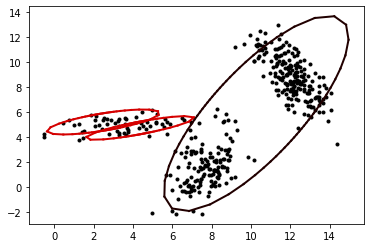

Log Likelihood After Iter 27 : -1877.941


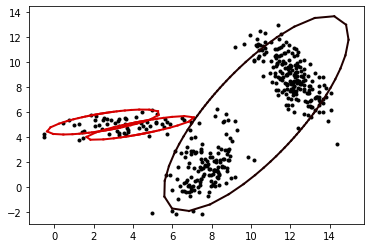

Log Likelihood After Iter 28 : -1877.938


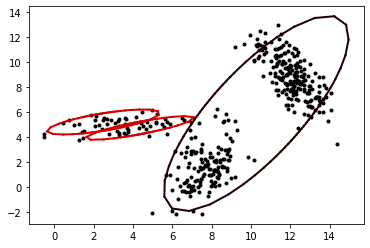

Log Likelihood After Iter 29 : -1877.935


In [16]:
#define number of components to estimate
nGaussEst = 3

#fit mixture of Gaussians (Pretend someone handed you some data. Now what?)
mixGaussEst = fitMixGauss(data,nGaussEst);